# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [1]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 44.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor()])

# Create training set and define training dataloader
trainset = datasets.MNIST('~/Dataset',
                          download=True, 
                          train=True, 
                          transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=128, 
                                          shuffle=True)


# Create test set and define test dataloader
testset = datasets.MNIST('~/Dataset', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)


Extracting /root/Dataset/MNIST/raw/train-images-idx3-ubyte.gz to /root/Dataset/MNIST/raw




Extracting /root/Dataset/MNIST/raw/train-labels-idx1-ubyte.gz to /root/Dataset/MNIST/raw




Extracting /root/Dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/Dataset/MNIST/raw




Extracting /root/Dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/Dataset/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

Answer: The choice of only using transforms.ToTensor() is because of the nature of the MNIST dataset. MNIST is a relatively simple dataset (28x28 pixels), and the values of the pixels range from 0 to 255. The aim is to recognize and classify the digits accurately. 

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


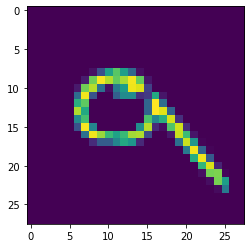

7


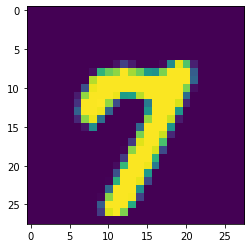

5


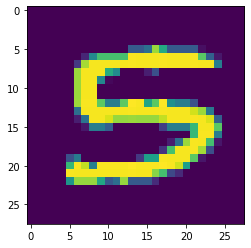

5


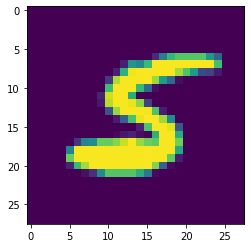

0


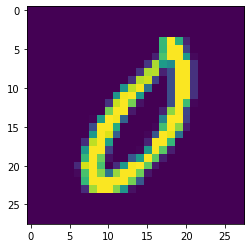

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(testloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
epochs = 50
train_loss=[]
val_loss=[]
valid_loss=0;running_loss=0;
for e in range(epochs):
    running_loss = 0
    valid_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    for images, labels in testloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        valid_loss += loss.item()
    else:
        train = running_loss/len(trainloader)
        valid = valid_loss/len(testloader)    
        print(f"Epoch: {e}", f"    Training loss: {train}",f"    Validation loss: {valid}")
        train_loss.append(train)
        val_loss.append(valid)

Epoch: 0     Training loss: 0.3167615613417585     Validation loss: 0.1532183452686177
Epoch: 1     Training loss: 0.11745497466785822     Validation loss: 0.09218725520834516
Epoch: 2     Training loss: 0.0786096287746308     Validation loss: 0.0908475227571458
Epoch: 3     Training loss: 0.05873428973287884     Validation loss: 0.07588027492519232
Epoch: 4     Training loss: 0.04629673718460905     Validation loss: 0.08210137036122099
Epoch: 5     Training loss: 0.03809243738939211     Validation loss: 0.0761251406909167
Epoch: 6     Training loss: 0.034121406627625334     Validation loss: 0.08622375068172247
Epoch: 7     Training loss: 0.02841485369412391     Validation loss: 0.09016343946509724
Epoch: 8     Training loss: 0.023096917631369687     Validation loss: 0.09899371265304051
Epoch: 9     Training loss: 0.02273101256315116     Validation loss: 0.1143863960699756
Epoch: 10     Training loss: 0.01959488844467468     Validation loss: 0.09440301212812244
Epoch: 11     Training l

Plot the training loss (and validation loss/accuracy, if recorded).

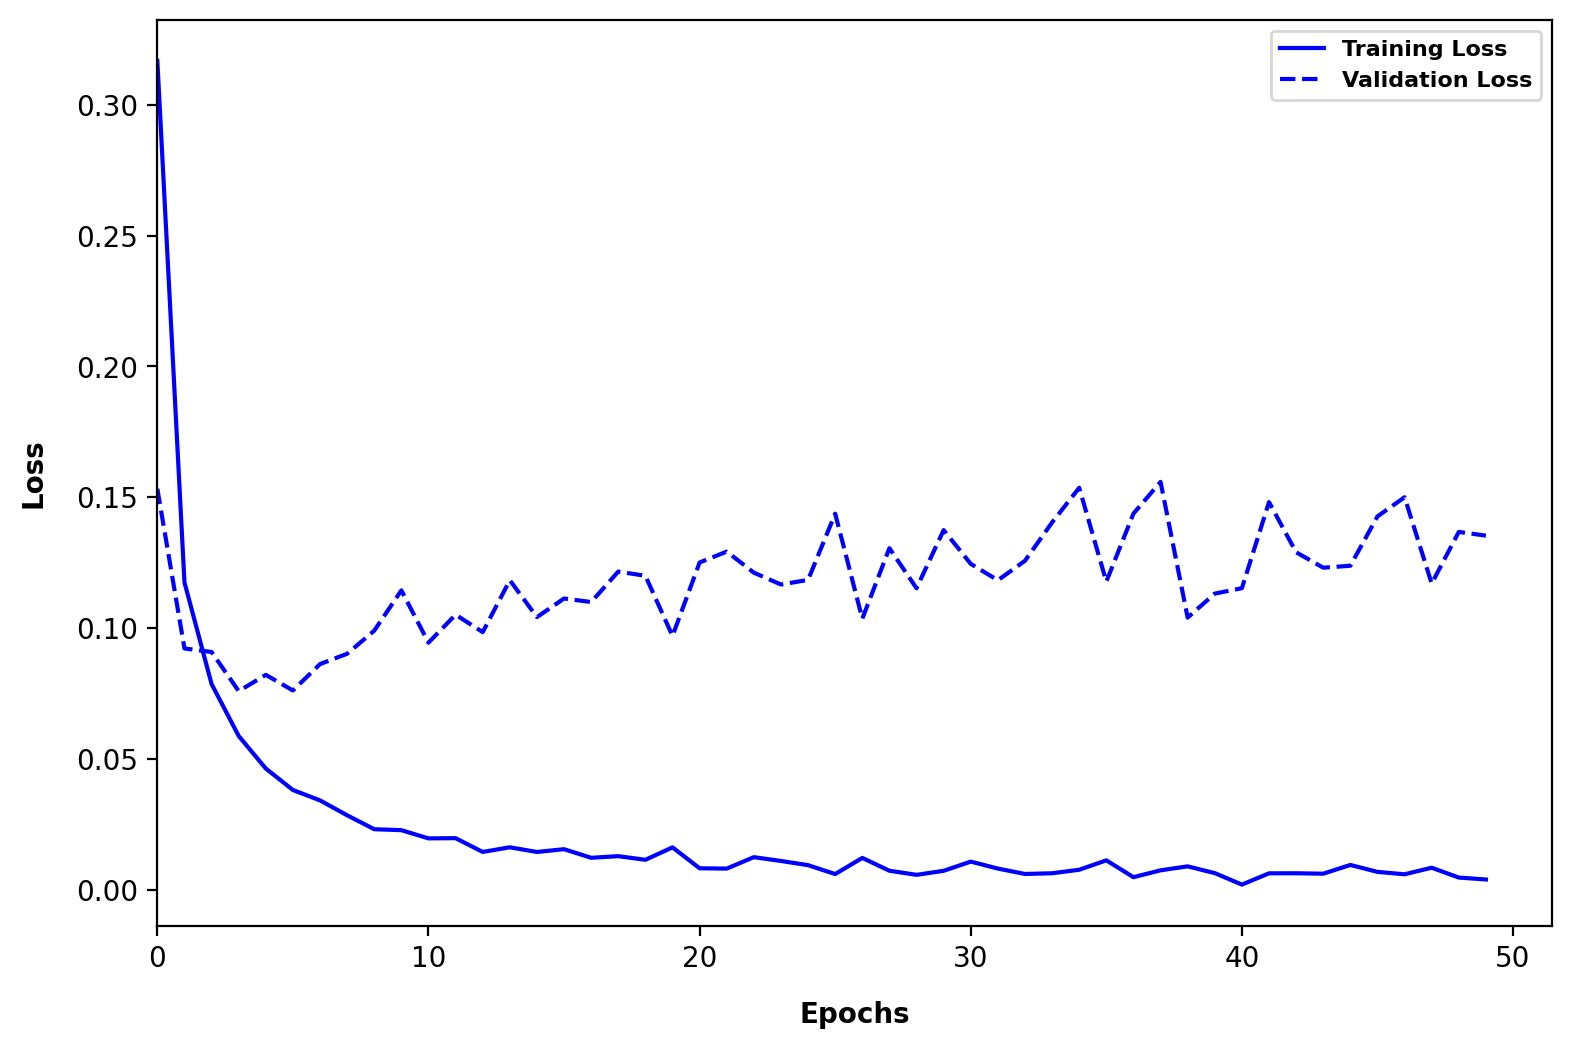

In [9]:
## YOUR CODE HERE ##
fig=plt.figure(figsize=(9,6),dpi=200)
x=[epoch for epoch in range(epochs)]
plt.plot(x,train_loss,'b',label='Training Loss')
plt.plot(x,val_loss,'b',linestyle='dashed',label='Validation Loss')

plt.xlabel("Epochs",fontweight='bold',labelpad=10)
plt.ylabel("Loss",fontweight='bold',labelpad=10)
plt.xlim(xmin = 0)

plt.legend(prop={'size': 8,'weight':'bold'},loc="best")

plt.savefig(r'Losses.png',bbox_inches="tight")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
#upload a presaved model
model.load_state_dict(torch.load('MNIST.pt'))

<All keys matched successfully>

In [13]:
Yes=0
No=0
for images, labels in  testloader:
    #print("Loop started")
    # Get the class probabilities
    ps = torch.exp(model(images))
    values, index = ps.topk(1, dim=1)
    # Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
    #print("Size of one batch, ",ps.shape)
    #print(index.shape[0])
    for i in range(index.shape[0]):
        if index[i] == labels[i]:
            #print("Yes index",i)
            Yes+=1
        elif index[i] != labels[i]:
            #print("No index",i)
            No+=1
print("Total accuracy is",(Yes/(Yes+No))*100)

Total accuracy is 97.99


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

### The accuracy is very fine at 97.99%

## Saving your model
Using `torch.save`, save your model for future loading.

In [10]:
## YOUR CODE HERE ##
torch.save(model.state_dict(), 'MNIST.pt')